In [ ]:
# This code uses FEniCSx open-source computing platform (https://fenicsproject.org) for FEM
# This notebook implements fenics solver for linear elastic problem.
# Resource: (https://fenics-solid-tutorial.readthedocs.io/en/latest/2DPlaneStrain/2D_Elasticity.html)

---
## Ex.1 - Rectangular Block

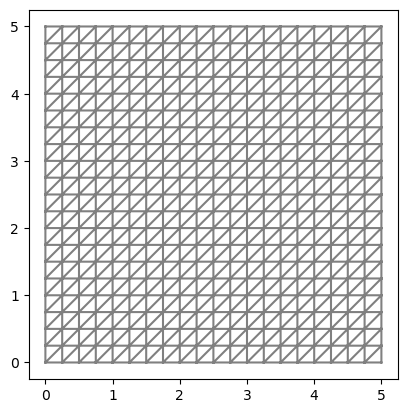

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


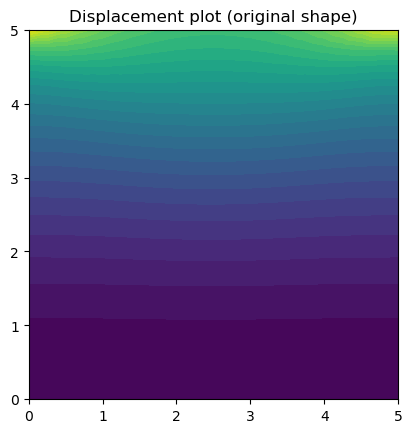

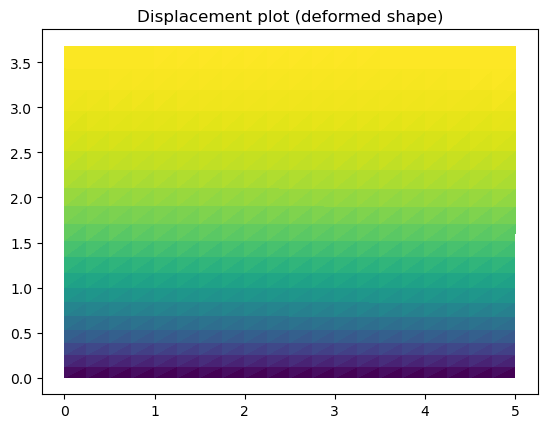

Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


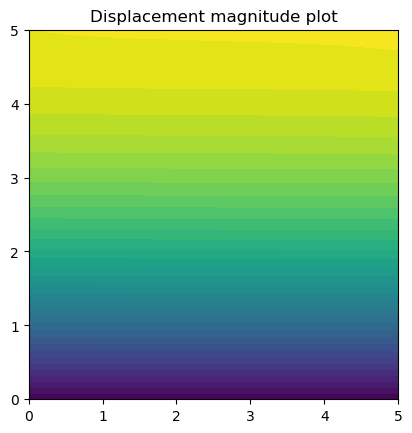

In [17]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np

# boolean bottom boundary ftion
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))

# auxiliary strain function
def epsilon(u):
    return fe.sym(fe.grad(u))

# auxiliary stress function
def sigma(u):
    return lambda_*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)


# Params (density, young, poisson, dimensions of the block)
rho = fe.Constant(200.0) # Density
E = 0.02e9               # Young's modulus
nu = 0.0                 # Poisson's ratio

# Lame's constants
mu = E/2/(1+nu)
lambda_ = E*nu/(1+nu)/(1-2*nu)         # general case
lambda_ = 2*mu*lambda_/(lambda_+2*mu)  # for plane stress


l_x, l_y = 5.0, 5.0  # Domain dimensions
n_x, n_y = 20, 20    # Number of elements

# Load
g_z = -2.9575e5
b_z = -10000.0
g = fe.Constant((0.0, g_z))
b = fe.Constant((0.0, b_z))


# Geometry for the block
mesh = fe.RectangleMesh(fe.Point(0.0, 0.0), fe.Point(l_x, l_y), n_x, n_y)  # point 1 - lower left
                                                                           # point 2 - top right
fe.plot(mesh)
plt.show()


# Function spaces
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)


# Boundary conditions - fixed bottom:
bc = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)  # fixes points at the bottom in both X and Y
#bc = fe.DirichletBC(V.sub(1), 0.0, bottom)              # fixes the Y direction

# Neumann conditions for the top:
top = fe.AutoSubDomain(lambda x: fe.near(x[1], l_y))
boundaries = fe.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)   # Definition of Neumann boundary condition domain
boundaries.set_all(0)
top.mark(boundaries, 1)
ds = fe.ds(subdomain_data=boundaries)


# Weak form equation
a = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx
l = rho*fe.dot(b, u_test)*fe.dx + fe.inner(g, u_test)*ds(1)


# Init the solver
u = fe.Function(V)
A, L = fe.assemble_system(a, l, bc)
problem = fe.LinearVariationalProblem(a,l,u,bc)
solver = fe.LinearVariationalSolver(problem)


# Solving
fe.solve(A, u.vector(), L)


# plotting
fe.plot(u.sub(0), title="Displacement plot (original shape)")
plt.show()

fe.plot(u, mode='displacement', title="Displacement plot (deformed shape)")
plt.show()

fe.plot(fe.sqrt(u.sub(0)**2 + u.sub(1)**2), title= "Displacement magnitude plot")  # (my solution)
plt.show()

In [65]:
# applying fenics FEA to more complicated topology - SIMPLE SQUARE OUTLINE
# LOADING: ->[]<-



TypeError: unsupported operand type(s) for -: 'dolfin.cpp.generation.RectangleMesh' and 'dolfin.cpp.generation.RectangleMesh'

In [34]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np


# --------------------
# Functions and classes
# --------------------
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))

# Strain function
def epsilon(u):
    return fe.sym(fe.grad(u))

# Stress function
def sigma(u):
    return lambda_*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)

# --------------------
# Parameters
# --------------------

# Density
rho = fe.Constant(200.0)

# Young's modulus and Poisson's ratio
E = 0.02e9
nu = 0.0

# Lame's constants
lambda_ = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)

l_x, l_y = 5.0, 5.0  # Domain dimensions
n_x, n_y = 20, 20  # Number of elements

# Load
g_z = -2.9575e5
b_z = -10.0
g = fe.Constant((0.0, g_z))
b = fe.Constant((0.0, b_z))

# Model type
model = "plane_strain"
if model == "plane_stress":
    lambda_ = 2*mu*lambda_/(lambda_+2*mu)

# --------------------
# Geometry
# --------------------
mesh = Mesh("./testmesh.xdmf")
#mf = fe.Mesh('./mf.xdmf')

# Definition of Neumann condition domain
boundaries = fe.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

top = fe.AutoSubDomain(lambda x: fe.near(x[1], l_y))

top.mark(boundaries, 1)
ds = fe.ds(subdomain_data=boundaries)

# --------------------
# Function spaces
# --------------------
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)

# --------------------
# Boundary conditions
# --------------------
bc = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)

# --------------------
# Weak form
# --------------------
a = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx
l = rho*fe.dot(b, u_test)*fe.dx + fe.inner(g, u_test)*ds(1)

# --------------------
# Solver
# --------------------
u = fe.Function(V)
A_ass, L_ass = fe.assemble_system(a, l, bc)

fe.solve(A_ass, u.vector(), L_ass)

print(np.amax(u.vector()[:]))

# --------------------
# Post-process
# --------------------
fe.plot(u, mode="displacement")
plt.show()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to open file.
*** Reason:  Unknown file type (".xdmf") for file "./testmesh.xdmf".
*** Where:   This error was encountered inside File.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [4]:
# import meshio
# #from dolfin import Mesh, XDMFFile, File, MeshValueCollection, cpp, Measure, \
#     # DirichletBC, FunctionSpace, Constant, TrialFunction, \
#     # TestFunction, dot, grad, dx, Function, solve
#
# msh = meshio.read("./meshes/test_mesh.msh")
# Wri_path = './meshes/'
# meshio.write(Wri_path+"test_mesh_format.xdmf",
#              meshio.Mesh(points=msh.points,
#                          cells={"triangle": msh.cells["triangle"]}))
#
# meshio.write(Wri_path+"mf.xdmf",
#              meshio.Mesh(points=msh.points,
#                          cells={"line": msh.cells["line"]},
#                          cell_data={"line": {"name_to_read": msh.cell_data["line"]["gmsh:physical"]}}))
#
# mesh = Mesh()
# with XDMFFile(Wri_path+"mesh.xdmf") as infile:
#     infile.read(mesh)
# File(Wri_path+"Dolfin_circle_mesh.pvd").write(mesh)
#
# mvc = MeshValueCollection("size_t", mesh, 1)
# with XDMFFile(Wri_path+"mf.xdmf") as infile:
#     infile.read(mvc, "name_to_read")
#


# import
import fenics as fn
import dolfin
import sys
import numpy
import matplotlib.pyplot as plt
import gmsh

fullDim = 3 #2D model
Wri_path = './meshes/'

'''
##### this is new ################
import meshio
mesh_from_file = meshio.read("./meshes/test_mesh.msh")

import numpy
def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:physical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points, cells={cell_type: cells}, cell_data={"name_to_read":[cell_data]})
    if prune_z:
        out_mesh.prune_z_0()
    return out_mesh

line_mesh = create_mesh(mesh_from_file, "line", prune_z=True)
meshio.write("./facet_mesh.xdmf", line_mesh)

triangle_mesh = create_mesh(mesh_from_file, "triangle", prune_z=True)
meshio.write("./mesh.xdmf", triangle_mesh)

######### the rest is unchanged ###############
'''

mesh = fn.Mesh()
# MVC - data associated with entities of the mesh of topological dimension == 2
mvc = fn.MeshValueCollection("size_t", mesh, fullDim)
with fn.XDMFFile("testmesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
# MF - mesh ftion is defined at the set of mesh entities of topological dimension==2
mf = fn.cpp.mesh.MeshFunctionSizet(mesh, mvc)

# MVC2 - data associated with entities of the mesh of topological dimension == 1
mvc2 = fn.MeshValueCollection("size_t", mesh, fullDim-1)
with fn.XDMFFile("mf.xdmf") as infile:
    infile.read(mvc2, "name_to_read")
# MF - curve ftion is defined at the set of mesh entities of topological dimension==1
cf = fn.cpp.mesh.MeshFunctionSizet(mesh, mvc2)

# and then the rest
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
File(Wri_path+"testmesh_facets.pvd").write(mf)

V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions base on GMSH mesh marks [Physical Curves: 1, 2, 3, 4]
bc1 = DirichletBC(V, Constant(0.0), mf, 1)
#bc2 = DirichletBC(V, Constant(10.0), mf, 2)
#bc3 = DirichletBC(V, Constant(6.0), mf, 3)
#bc4 = DirichletBC(V, Constant(3.0), mf, 4)

bc = [bc1, bc2, bc3, bc4]

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-15.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)
File("Solution.pvd").write(u)

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to create Dirichlet boundary condition.
*** Reason:  User MeshFunction is not a facet MeshFunction (dimension is wrong).
*** Where:   This error was encountered inside DirichletBC.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [25]:
from dolfin import *
import meshio
import matplotlib.pyplot as plt

def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:physical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points, cells={cell_type: cells}, cell_data={"name_to_read":[cell_data]})
    if prune_z:
        out_mesh.prune_z_0()
    return out_mesh

msh = meshio.read("./meshes/test_mesh7.msh")
triangle_mesh = create_mesh(msh, "triangle", True)
line_mesh = create_mesh(msh, "line", True)
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

mesh = Mesh()
xdmf = XDMFFile(mesh.mpi_comm(),"mesh.xdmf")
xdmf.read(mesh)
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
xdmf.close()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim()-1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

ds_custom = Measure("dS", domain=mesh, subdomain_data=mf)
dx_custom = Measure("dx", domain=mesh, subdomain_data=cf)

KeyError: 'gmsh:physical'

In [16]:
from topopt import main
main(nelx=180, nely=60, volfrac=0.5, penal=3.0, rmin=2.0)

 # A 55 LINE TOPOLOGY OPTIMIZATION CODE
from dolfin import *
import numpy as np
#import sklearn.metrics.pairwise as sp

def main(nelx, nely, volfrac, penal, rmin):
    sigma = lambda _u: 2.0 * mu * sym(grad(_u)) + lmbda * tr(sym(grad(_u))) * Identity(len(_u))

psi = lambda _u: lmbda / 2 * (tr(sym(grad(_u))) ** 2) + mu * tr(sym(grad(_u)) * sym(grad(_u)))
xdmf = XDMFFile("output/density.xdmf")
mu, lmbda = Constant(0.4), Constant(0.6)

# PREPARE FINITE ELEMENT ANALYSIS ----------------------------------
mesh = RectangleMesh(Point(0, 0), Point(nelx, nely), nelx, nely, "right/left")
U = VectorFunctionSpace(mesh, "P", 1)
D = FunctionSpace(mesh, "DG", 0)
u, v = TrialFunction(U), TestFunction(U)
u_sol, density_old, density = Function(U), Function(D), Function(D, name="density")
density.vector()[:] = volfrac

# DEFINE SUPPORT ---------------------------------------------------
support = CompiledSubDomain("near(x[0], 0.0, tol) && on_boundary", tol=1e-14)
bcs = [DirichletBC(U, Constant((0.0, 0.0)), support)]

# DEFINE LOAD ------------------------------------------------------
load_marker = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
CompiledSubDomain("x[0]==l && x[1]<=2", l=nelx).mark(load_marker, 1)
ds = Measure("ds")(subdomain_data=load_marker)
F = dot(v, Constant((0.0, -1.0))) * ds(1)

# SET UP THE VARIATIONAL PROBLEM AND SOLVER ------------------------
K = inner(density ** penal * sigma(u), grad(v)) * dx
problem = LinearVariationalProblem(K, F, u_sol, bcs)
solver = LinearVariationalSolver(problem)

# PREPARE DISTANCE MATRICES FOR FILTER -----------------------------
midpoint = [cell.midpoint().array()[:] for cell in cells(mesh)]
distance_mat = rmin - 0.5#sp.euclidean_distances(midpoint, midpoint)
distance_mat[distance_mat < 0] = 0
distance_sum = distance_mat.sum(1)

# START ITERATION --------------------------------------------------
loop, change = 0, 1
while change > 0.01 and loop < 2000:
    loop=loop+1
density_old.assign(density)

# FE-ANALYSIS --------------------------------------------------
solver.solve()

# OBJECTIVE FUNCTION AND SENSITIVITY ANALYSIS ------------------
objective = project(density ** penal * psi(u_sol), D).vector()[:]
sensitivity = -penal * (density.vector()[:]) ** (penal - 1) * project(psi(u_sol), D).vector()[:]

# FILTERING/MODIFICATION OF SENSITIVITIES ----------------------
sensitivity = np.divide(distance_mat @ np.multiply(density.vector()[:], sensitivity), np.multiply(
    density.vector()[:], distance_sum))

# DESIGN UPDATE BY THE OPTIMALITY CRITERIA METHOD --------------
l1, l2, move = 0, 100000, 0.2
while l2 - l1 > 1e-4:
    l_mid = 0.5 * (l2 + l1)
    density_new = np.maximum(0.001,np.maximum(density.vector()[:] - move, np.minimum(1.0, np.minimum
    (density.vector()[:] + move, density.vector()[:] * np.sqrt(-sensitivity / l_mid)))))
    l1, l2 = (l_mid, l2) if sum(density_new) - volfrac * mesh.num_cells() > 0 else (l1, l_mid)
density.vector()[:] = density_new

# PRINT RESULTS ------------------------------------------------
change = norm(density.vector()-density_old.vector(), norm_type="linf", mesh=mesh)
print("it.: {0} , obj.: {1:.3f} Vol.: {2:.3f}, ch.: {3:.3f}".format(loop, sum(objective), sum(
    density.vector()[:]) / mesh.num_cells(), change))
xdmf.write(density, loop)

ModuleNotFoundError: No module named 'topopt'

In [43]:
# fenics book example of linear elasticity

from dolfin import * # Create mesh
import fenics as fe

mesh = Mesh(".meshes/testmesh.xdmf")
# Create function space
V = VectorFunctionSpace(mesh, "Lagrange", 2)
# Create test and trial functions, and source term
u, w = TrialFunction(V), TestFunction(V)
b = Constant((1.0, 0.0, 0.0))
# Elasticity parameters
E, nu = 10.0, 0.3
mu, lmbda = E/(2.0*(1.0 + nu)), E*nu/((1.0 + nu)*(1.0 - 2.0*nu))
# Stress
sigma = 2*mu*sym(grad(u)) + lmbda*tr(grad(u))*Identity(w.cell().d)
# Governing balance equation
F = inner(sigma, grad(w))*dx - dot(b, w)*dx
# Extract bilinear and linear forms from F
a, L = lhs(F), rhs(F)
# Dirichlet boundary condition on entire boundary
c  = Constant((0.0, 0.0, 0.0))
bc = DirichletBC(V, c, DomainBoundary())
# Set up PDE and solve
u = Function(V)
problem = LinearVariationalProblem(a, L, u, bcs=bc)
solver = LinearVariationalSolver(problem)
solver.parameters["symmetric"] = True
solver.solve()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to read data from XML file.
*** Reason:  Unable to open file ".meshes/testmesh.xml".
*** Where:   This error was encountered inside XMLFile.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [46]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np


# --------------------
# Functions and classes
# --------------------
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))

# Strain function
def epsilon(u):
    return fe.sym(fe.grad(u))

# Stress function
def sigma(u):
    return lambda_*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)


# --------------------
# Parameters
# --------------------

# Density
rho = fe.Constant(200.0)

# Young's modulus and Poisson's ratio
E = 0.02e9
nu = 0.0

# Lame's constants
lambda_ = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)

l_x, l_y = 5.0, 5.0  # Domain dimensions
n_x, n_y = 20, 20  # Number of elements

# Load
g_z = -2.9575e5
b_z = -10.0
g = fe.Constant((0.0, g_z))
b = fe.Constant((0.0, b_z))

# Model type
model = "plane_strain"
if model == "plane_stress":
    lambda_ = 2*mu*lambda_/(lambda_+2*mu)

# --------------------
# Geometry
# --------------------
mesh = fe.Mesh("./meshes/testmesh.xdmf")

# Definition of Neumann condition domain
boundaries = fe.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)

top = fe.AutoSubDomain(lambda x: fe.near(x[1], l_y))

top.mark(boundaries, 1)
ds = fe.ds(subdomain_data=boundaries)

# --------------------
# Function spaces
# --------------------
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)

# --------------------
# Boundary conditions
# --------------------
bc = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)

# --------------------
# Weak form
# --------------------
a = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx
l = rho*fe.dot(b, u_test)*fe.dx + fe.inner(g, u_test)*ds(1)

# --------------------
# Solver
# --------------------
u = fe.Function(V)
A_ass, L_ass = fe.assemble_system(a, l, bc)

fe.solve(A_ass, u.vector(), L_ass)

print(np.amax(u.vector()[:]))

# --------------------
# Post-process
# --------------------
fe.plot(u, mode="displacement")
plt.show()

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to open file.
*** Reason:  Unknown file type (".xdmf") for file "./meshes/testmesh.xdmf".
*** Where:   This error was encountered inside File.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [47]:
# based on 3D Linear Elasticity on Cantilever Beam - https://www.youtube.com/watch?v=ibgALqJOX-I
import fenics as fe

"""
Solves the equations for linear elasticity in structural mechanics using the
Finite Element Method with FEniCS in Python. The primary unknown is the
displacement u which is a 3D vector field in 3D space.


Cauchy Momentum Equation:           − ∇⋅σ = f

Constitutive Stress-Strain:         σ = λ tr(ε) I₃ + 2 μ ε

Displacement-Strain:                ε = 1/2 (∇u + (∇u)ᵀ)


σ  : Cauchy Stress (3x3 matrix)
f  : Forcing right hand side (3D vector)
λ  : Lambda Lame parameter (scalar)
μ  : Mu Lame parameter (scalar)
ε  : Engineering Strain (3x3 matrix)
I₃ : 3x3 Identity tensor (=matrix)
u  : Displacement (3D vector)

∇⋅ : The divergence operator (here contracts matrix to vector)
tr : The trace operator (sum of elements on main diagonal)
∇  : The gradient operator (here expands vector to matrix)
ᵀ  : The transpose operatore

-------

Scenario:

A cantilever beam is clamped at one end

               .+------------------------+
             .' |                      .'|
            +---+--------------------+'  |      ↓ gravity
   clamped  |   |                    |   |
            |  ,+--------------------+---+
            |.'                      | .'
            +------------------------+'

It is subject to the load due to its own weight and will
deflect accordingly. Under an assumpation of small
deformation the material follows linear elasticity.

------

Solution strategy.:


Define by "v" a test function from the vector function space
on u.

Weak Form:

    <σ(u), ∇v> = <f, v> + <T, v>

with T being the traction vector to prescribe Neumann BC (here =0)


Alternative Weak Form (more commonly used):

    <σ(u), ε(v)> = <f, v> + <T, v>

(valid because σ(u) will always be symmetric and the inner product
of a symmetric matrix with a non-symmetric matrix vanishes)

------

Once the displacement vector field u is obtained, we can compute the
von Mises stress (a scalar stress measure) by

1. Evaluating the deviatoric stress tensor

    s = σ − 1/3 tr(σ) I₃

2. Computing the von Mises stress

    σ_M = √(3/2 s : s)

"""

import fenics as fe

CANTILEVER_LENGTH = 1.0
CANTILEVER_WIDTH = 0.2

N_POINTS_LENGTH = 10
N_POINTS_WIDTH = 3

LAME_MU = 1.0
LAME_LAMBDA = 1.25
DENSITY = 1.0
ACCELERATION_DUE_TO_GRAVITY = 0.016


# Mesh and Vector Function Space
mesh = fe.BoxMesh(
    fe.Point(0.0, 0.0, 0.0),
    fe.Point(CANTILEVER_LENGTH, CANTILEVER_WIDTH, CANTILEVER_WIDTH),
    N_POINTS_LENGTH,
    N_POINTS_WIDTH,
    N_POINTS_WIDTH,
)
lagrange_vector_space_first_order = fe.VectorFunctionSpace(
    mesh,
    "Lagrange",
    1,
)

# Boundary Conditions
def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < fe.DOLFIN_EPS

dirichlet_clamped_boundary = fe.DirichletBC(
    lagrange_vector_space_first_order,
    fe.Constant((0.0, 0.0, 0.0)),
    clamped_boundary,
)

# Define strain and stress
def epsilon(u):
    engineering_strain = 0.5 * (fe.nabla_grad(u) + fe.nabla_grad(u).T)
    return engineering_strain

def sigma(u):
    cauchy_stress = (
            LAME_LAMBDA * fe.tr(epsilon(u)) * fe.Identity(3)
            +
            2 * LAME_MU * epsilon(u)
    )
    return cauchy_stress

# Define weak form
u_trial = fe.TrialFunction(lagrange_vector_space_first_order)
v_test = fe.TestFunction(lagrange_vector_space_first_order)
forcing = fe.Constant((0.0, 0.0, - DENSITY * ACCELERATION_DUE_TO_GRAVITY))
traction = fe.Constant((0.0, 0.0, 0.0))

weak_form_lhs = fe.inner(sigma(u_trial), epsilon(v_test)) * fe.dx  # Crucial to use inner and not dot
weak_form_rhs = (
        fe.dot(forcing, v_test) * fe.dx
        +
        fe.dot(traction, v_test) * fe.ds
)

# Compute solution
u_solution = fe.Function(lagrange_vector_space_first_order)
fe.solve(
    weak_form_lhs == weak_form_rhs,
    u_solution,
    dirichlet_clamped_boundary,
)

# Compute the von Mises stress
deviatoric_stress_tensor = (
        sigma(u_solution)
        -
        1/3 * fe.tr(sigma(u_solution)) * fe.Identity(3)
)
von_Mises_stress = fe.sqrt(3/2 * fe.inner(deviatoric_stress_tensor, deviatoric_stress_tensor))

lagrange_scalar_space_first_order = fe.FunctionSpace(
    mesh,
    "Lagrange",
    1,
)
von_Mises_stress = fe.project(von_Mises_stress, lagrange_scalar_space_first_order)

# Write out fields for visualization with Paraview
u_solution.rename("Displacement Vector", "")
von_Mises_stress.rename("von Mises stress", "")

beam_deflection_file = fe.XDMFFile("beam_deflection.xdmf")
beam_deflection_file.parameters["flush_output"] = True
beam_deflection_file.parameters["functions_share_mesh"] = True
beam_deflection_file.write(u_solution, 0.0)
beam_deflection_file.write(von_Mises_stress, 0.0)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [6]:
from dolfin import *
import fenics as fe

mesh = Mesh()
f = fe.XDMFFile("testmesh.xdmf")
f.read(mesh)
f.close()
#plot(mesh)
print(mesh.coordinates())


[[0.         0.         0.        ]
 [0.1        0.         0.        ]
 [0.1        0.3        0.        ]
 ...
 [0.00556526 0.06168506 0.        ]
 [0.03076776 0.19479977 0.        ]
 [0.00204105 0.28333677 0.        ]]


In [11]:
from dolfin import *

mesh = Mesh()
with XDMFFile("testmesh.xdmf") as infile:
    infile.read(mesh)

physical_reg = MeshValueCollection('size_t', mesh, mesh.topology().dim())
with XDMFFile("testmesh.xdmf") as infile:
    infile.read(physical_reg, "Solid")
cf = cpp.mesh.MeshFunctionSizet(mesh, physical_reg)

facet_reg = MeshValueCollection('size_t', mesh, mesh.topology().dim()-1)
with XDMFFile("testmesh.xdmf") as infile:
    infile.read(facet_reg, "Face")
ff = cpp.mesh.MeshFunctionSizet(mesh, facet_reg)


facet_reg2 = MeshValueCollection('size_t', mesh, mesh.topology().dim()-1)
with XDMFFile("testmesh.xdmf") as infile:
    infile.read(facet_reg2, "Top")
ff2 = cpp.mesh.MeshFunctionSizet(mesh, facet_reg2)


dx = Measure("dx", domain=mesh, subdomain_data=cf, metadata={'quadrature_degree': 2})
ds_front = Measure("ds", domain=mesh, subdomain_data=ff, metadata={'quadrature_degree': 2})
ds_top = Measure("ds", domain=mesh, subdomain_data=ff2, metadata={'quadrature_degree': 2})

vol = assemble(1*dx(4))
surf = assemble(1*ds_front(2))
surf_top = assemble(1*ds_top(8))

print("total volume: " + str(vol))
print("front surface: " + str(surf))
print("top surface: " + str(surf_top))

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to recognise cell type.
*** Reason:  Unknown value "".
*** Where:   This error was encountered inside XDMFFile.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [2]:
# =========================
#  2D linear elasticity
# =========================
#
#
# Introduction
# ------------
#
# In this first numerical tour, we will show how to compute a small strain solution for
# a 2D isotropic linear elastic medium, either in plane stress or in plane strain,
# in a tradtional displacement-based finite element formulation. The corresponding
# file can be obtained from :download:`2D_elasticity.py`.
#
# .. seealso::
#
#  Extension to 3D is straightforward and an example can be found in the :ref:`ModalAnalysis` example.
#
# We consider here the case of a cantilever beam modeled as a 2D medium of dimensions
# :math:`L\times  H`. Geometrical parameters and mesh density are first defined
# and the rectangular domain is  generated using the ``RectangleMesh`` function.
# We also choose a criss-crossed structured mesh::

from dolfin import *
import fenics as fe

L = 25.
H = 1.
Nx = 250
Ny = 10
#mesh = RectangleMesh(Point(0., 0.), Point(L, H), Nx, Ny, "crossed")  # orig
mesh = Mesh()
f = fe.XDMFFile("testmesh.xdmf")
f.read(mesh)
f.close()


# Constitutive relation
# ---------------------
#
# We now define the material parameters which are here given in terms of a Young's
# modulus :math:`E` and a Poisson coefficient :math:`\nu`. In the following, we will
# need to define the constitutive relation between the stress tensor :math:`\boldsymbol{\sigma}`
# and the strain tensor :math:`\boldsymbol{\varepsilon}`. Let us recall
# that the general expression of the linear elastic isotropic constitutive relation
# for a 3D medium is given by:
#
# .. math::
#  \boldsymbol{\sigma} = \lambda \text{tr}(\boldsymbol{\varepsilon})\mathbf{1} + 2\mu\boldsymbol{\varepsilon}
#  :label: constitutive_3D
#
# for a natural (no prestress) initial state where the Lamé coefficients are given by:
#
# .. math::
#  \lambda = \dfrac{E\nu}{(1+\nu)(1-2\nu)}, \quad \mu = \dfrac{E}{2(1+\nu)}
#  :label: Lame_coeff
#
# In this demo, we consider a 2D model either in plane strain or in plane stress conditions.
# Irrespective of this choice, we will work only with a 2D displacement vector :math:`\boldsymbol{u}=(u_x,u_y)`
# and will subsequently define the strain operator ``eps`` as follows::

def eps(v):
    return sym(grad(v))

# which computes the 2x2 plane components of the symmetrized gradient tensor of
# any 2D vectorial field. In the plane strain case, the full 3D strain tensor is defined as follows:
#
# .. math::
#  \boldsymbol{\varepsilon} = \begin{bmatrix} \varepsilon_{xx} & \varepsilon_{xy} & 0\\
#  \varepsilon_{xy} & \varepsilon_{yy} & 0 \\ 0 & 0 & 0\end{bmatrix}
#
# so that the 2x2 plane part of the stress tensor is defined in the same way as for the 3D case
# (the out-of-plane stress component being given by :math:`\sigma_{zz}=\lambda(\varepsilon_{xx}+\varepsilon_{yy})`.
#
# In the plane stress case, an out-of-plane strain component :math:`\varepsilon_{zz}`
# must be considered so that :math:`\sigma_{zz}=0`. Using this condition in the
# 3D constitutive relation, one has :math:`\varepsilon_{zz}=-\dfrac{\lambda}{\lambda+2\mu}(\varepsilon_{xx}+\varepsilon_{yy})`.
# Injecting into :eq:`constitutive_3D`, we have for the 2D plane stress relation:
#
# .. math::
#  \boldsymbol{\sigma} = \lambda^* \text{tr}(\boldsymbol{\varepsilon})\mathbf{1} + 2\mu\boldsymbol{\varepsilon}
#
# where :math:`\boldsymbol{\sigma}, \boldsymbol{\varepsilon}, \mathbf{1}` are 2D tensors and with
# :math:`\lambda^* = \dfrac{2\lambda\mu}{\lambda+2\mu}`. Hence, the 2D constitutive relation
# is identical to the plane strain case by changing only the value of the Lamé coefficient :math:`\lambda`.
# We can then have::

E = Constant(1e5)
nu = Constant(0.3)
model = "plane_stress"

mu = E/2/(1+nu)
lmbda = E*nu/(1+nu)/(1-2*nu)
if model == "plane_stress":
    lmbda = 2*mu*lmbda/(lmbda+2*mu)

def sigma(v):
    return lmbda*tr(eps(v))*Identity(2) + 2.0*mu*eps(v)

# .. note::
#  Note that we used the variable name ``lmbda`` to avoid any confusion with the
#  lambda functions of Python
#
#  We also used an intrinsic formulation of the constitutive relation. Example of
#  constitutive relation implemented with a matrix/vector engineering notation
#  will be provided in the :ref:`OrthotropicElasticity` example.
#
#
# Variational formulation
# -----------------------
#
# For this example, we consider a continuous polynomial interpolation of degree 2
# and a uniformly distributed loading :math:`\boldsymbol{f}=(0,-f)` corresponding
# to the beam self-weight. The continuum mechanics variational formulation (obtained
# from the virtual work principle) is given by:
#
# .. math::
#  \text{Find } \boldsymbol{u}\in V \text{ s.t. } \int_{\Omega}
#  \boldsymbol{\sigma}(\boldsymbol{u}):\boldsymbol{\varepsilon}(\boldsymbol{v}) d\Omega
#  = \int_{\Omega} \boldsymbol{f}\cdot\boldsymbol{v}  d\Omega \quad \forall\boldsymbol{v} \in V
#
# which translates into the following FEniCS code::

rho_g = 1e-3
f = Constant((0, -rho_g))

V = VectorFunctionSpace(mesh, 'Lagrange', degree=2)
du = TrialFunction(V)
u_ = TestFunction(V)
a = inner(sigma(du), eps(u_))*dx
l = inner(f, u_)*dx


# Resolution
# ----------
#
# Fixed displacements are imposed on the left part of the beam, the ``solve``
# function is then called and solution is plotted by deforming the mesh::

def left(x, on_boundary):
    return near(x[0], 0.)

bc = DirichletBC(V, Constant((0.,0.)), left)

u = Function(V, name="Displacement")
solve(a == l, u, bc)

plot(1e3*u, mode="displacement")

# The (amplified) solution should look like this:
#
# .. image:: cantilever_deformed.png
#    :scale: 15%
#
#
# Validation and post-processing
# ------------------------------
#
# The maximal deflection is compared against the analytical solution from
# Euler-Bernoulli beam theory which is here :math:`w_{beam} = \dfrac{qL^4}{8EI}`::

print("Maximal deflection:", -u(L,H/2.)[1])
print("Beam theory deflection:", float(3*rho_g*L**4/2/E/H**3))

# One finds :math:`w_{FE} = 5.8638\text{e-3}` against :math:`w_{beam} = 5.8594\text{e-3}`
# that is a 0.07% difference.
#
#
# The stress tensor must be projected on an appropriate function space in order to
# evaluate pointwise values or export it for Paraview vizualisation. Here we choose
# to describe it as a (2D) tensor and project it onto a piecewise constant function
# space::

Vsig = TensorFunctionSpace(mesh, "DG", degree=0)
sig = Function(Vsig, name="Stress")
sig.assign(project(sigma(u), Vsig))
print("Stress at (0,H):", sig(0, H))

# Fields can be exported in a suitable format for vizualisation using Paraview.
# VTK-based extensions (.pvd,.vtu) are not suited for multiple fields and parallel
# writing/reading. Prefered output format is now .xdmf::

file_results = XDMFFile("elasticity_results.xdmf")
file_results.parameters["flush_output"] = True
file_results.parameters["functions_share_mesh"] = True
file_results.write(u, 0.)
file_results.write(sig, 0.)

Can't add expressions with different shapes.


UFLException: Can't add expressions with different shapes.

In [ ]:
# MSH -> XDMF    - this code seems to work!
import meshio

msh = meshio.read("./meshes/warwick_mesh.msh")
for cell in msh.cells:
    if cell.type == "triangle":
        triangle_cells = cell.data
    elif  cell.type == "tetra":
        tetra_cells = cell.data

for key in msh.cell_data_dict["gmsh:geometrical"].keys():
    if key == "triangle":
        triangle_data = msh.cell_data_dict["gmsh:geometrical"][key]
    elif key == "tetra":
        tetra_data = msh.cell_data_dict["gmsh:geometrical"][key]
#tetra_mesh = meshio.Mesh(points=msh.points, cells={"tetra": tetra_cells})
triangle_mesh =meshio.Mesh(points=msh.points,
                           cells=[("triangle", triangle_cells)],
                           cell_data={"name_to_read":[triangle_data]})
meshio.write("./meshes/warwick_mesh.xdmf", triangle_mesh)

meshio.write("./meshes/warwick_mf.xdmf", triangle_mesh)

<meshio mesh object>
  Number of points: 1788
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 24
    line: 20
    line: 13
    line: 202
    triangle: 3315
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical
Solving linear variational problem.
sol u


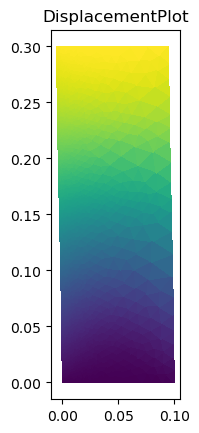

In [11]:
# FEniCS works for the imported mesh!

from fenics import *
import meshio
from ufl import nabla_div


def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:geometrical", cell_type)
    out_mesh = meshio.Mesh(points=mesh.points[:,:2], cells={cell_type: cells}, cell_data={"name_to_read": [cell_data]})
    return out_mesh

#msh = meshio.read("./meshes/smallSquare.msh")
msh = meshio.read("./meshes/test_mesh7.msh")
print(msh)

triangle_mesh = create_mesh(msh, "triangle", True)
line_mesh = create_mesh(msh, "line", True)
meshio.write("mesh.xdmf", triangle_mesh)
meshio.write("mf.xdmf", line_mesh)

from dolfin import *

mesh = Mesh()
mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim())
with XDMFFile("mesh.xdmf") as infile:
    infile.read(mesh)
    infile.read(mvc, "name_to_read")
cf = cpp.mesh.MeshFunctionSizet(mesh, mvc)

mvc = MeshValueCollection("size_t", mesh, mesh.topology().dim() - 1)
with XDMFFile("mf.xdmf") as infile:
    infile.read(mvc, "name_to_read")
mf = cpp.mesh.MeshFunctionSizet(mesh, mvc)
#ds = Measure('ds', domain=mesh, subdomain_data=mf)

#ds_custom = Measure("ds", domain=mesh, subdomain_data=mf)
#print(assemble(1*ds_custom(1)), assemble(1*ds_custom(2)))

#dolfin_plot(mf)

#boundaries = MeshFunction("size_t", mesh, dim=0)
#dolfin_plot(boundaries)

# Define function space for system of PDEs
degree = 2
lambda_ = 1
mu = 1
V = VectorFunctionSpace(mesh, 'P', degree)

# Define boundary conditions
tol = 1E-14


def clamped_boundary(x, on_boundary): # beam is only fixed on the bottom
    return on_boundary and near(x[1], 0, tol)#x[0] < tol


def force_on_top_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0.3, tol)


# https://fenicsproject.discourse.group/t/transitioning-from-mesh-xml-to-mesh-xdmf-from-dolfin-convert-to-meshio/412/93

# Boundary conditions
bc1 = DirichletBC(V, Constant((0, 0)), mf, 1)
bc2 = DirichletBC(V, Constant((-0.005, 0)), force_on_top_boundary)
bc3 = DirichletBC(V, Constant((0, 0)), clamped_boundary)

# Combine dirichlet boundary conditions
bcs = [bc1, bc2, bc3]


# Define strain and stress
def epsilon(u):  # strain
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    # return sym(nabla_grad(u))


def sigma(u):  # stress
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)


# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()     # space dimension
v = TestFunction(V)
f = Constant((0, 0))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v)) * dx
L = dot(f, v) * dx + dot(T, v) * ds

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution
print('sol u')
plot(u, title='DisplacementPlot', mode='displacement')